- **Purpose:** Dimensionality reduction and clustering of the previously preprocessed scATAC-seq dataset
- **Date:** September 15, 2025

# Step 1
Load libraries and read the data

In [1]:
# Load libraries
library(ArchR)
library(tidyverse)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
# Set seed and ArchR threads
set.seed(2025)
addArchRThreads(threads = 8)

Setting default number of Parallel threads to 8.



In [3]:
# Load the ArchR project
archr_proj <- loadArchRProject("/nexus/posix0/MPI-psych/g/dept-binder/mpsmgp/ahsant/tutorials/BloodTuotiral")
archr_proj

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

class: ArchRProject 
outputDirectory: /nexus/posix0/MPI-psych/g/dept-binder/mpsmgp/ahsant/tutorials/BloodTuotiral 
samples(1): pbmc10k
sampleColData names(1): ArrowFiles
cellColData names(15): Sample TSSEnrichment ... DoubletEnrichment
  BlacklistRatio
numberOfCells(1): 9252
medianTSS(1): 17.444
medianFrags(1): 19466

# Step 2
Dimensionality reduction

In [4]:
### Use iterative LSI
### Which selects highly variable features across clusters
### For 2+ iterations
### Based on the clustering efforts on results from iteration 1
archr_proj <- addIterativeLSI(
    ArchRProj = archr_proj,
    useMatrix = "TileMatrix",
    name = "IterativeLSI",
    iterations = 2,
    clusterParams = list(
        resolution = c(0.2, 0.3, 0.4),
        n.start = 10 # number of random starts
    ),
    varFeatures = 25000,
    dimsToUse = 1:30,
    saveIterations = FALSE,
    force = TRUE
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-546632973aed-Date-2025-09-15_Time-07-13-15.581676.log
If there is an issue, please report to github with logFile!

2025-09-15 07:13:18.310756 : Computing Total Across All Features, 0.006 mins elapsed.

2025-09-15 07:13:23.782612 : Computing Top Features, 0.097 mins elapsed.

###########
2025-09-15 07:13:24.622741 : Running LSI (1 of 2) on Top Features, 0.111 mins elapsed.
###########

2025-09-15 07:13:24.640872 : Creating Partial Matrix, 0.111 mins elapsed.

2025-09-15 07:13:57.529116 : Computing LSI, 0.659 mins elapsed.

2025-09-15 07:15:02.147766 : Identifying Clusters, 1.736 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
2025-09-15 07:15:17.617281 : Identified 9 Clusters, 1.994 mins elapsed.

2025-09-15 07:15:17.645824 : Creating Cluster Matrix on the total Group Features, 1.995 mins elapsed.

2025-09-15 07:15:30.849269 : Computing Variable Features, 2.215 mins elapsed.

#######

In [5]:
# Look at the reduced dimensions
archr_proj@reducedDims

List of length 1
names(1): IterativeLSI

*Only one sample is being used in thie tutorial. So, batch correction was not performed*

# Step 3
Clustering

In [6]:
# Find clusters
archr_proj <- addClusters(
    input = archr_proj,
    reducedDims = "IterativeLSI",
    method = "Seurat",
    name = "Clusters_r0.8",
    resolution = 0.8
)

ArchR logging to : ArchRLogs/ArchR-addClusters-54667bd939bd-Date-2025-09-15_Time-07-16-23.288042.log
If there is an issue, please report to github with logFile!

2025-09-15 07:16:24.228662 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9252
Number of edges: 359839

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8874
Number of communities: 18
Elapsed time: 0 seconds


2025-09-15 07:16:33.319415 : Testing Biased Clusters, 0.153 mins elapsed.

2025-09-15 07:16:33.397977 : Identified Biased Clusters (n = 2), set filterBias = TRUE to re-assign these cells: , 0.155 mins elapsed.

Biased Clusters : 
Cluster17 
Cluster8 


2025-09-15 07:16:33.408607 : Testing Outlier Clusters, 0.155 mins elapsed.

2025-09-15 07:16:33.414059 : Assigning Cluster Names to 18 Clusters, 0.155 mins elapsed.

2025-09-15 07:16:33.472165 : Finished addClusters, 0.156 mins elapsed.



In [7]:
# Find clusters while taking care of the biased clusters
archr_proj <- addClusters(
    input = archr_proj,
    reducedDims = "IterativeLSI",
    method = "Seurat",
    name = "Clusters_r0.8",
    resolution = 0.8,
    filterBias = TRUE,
    force = TRUE # rewrite the column
)

ArchR logging to : ArchRLogs/ArchR-addClusters-546637c1c8ec-Date-2025-09-15_Time-07-16-33.578518.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Clusters_r0.8

2025-09-15 07:16:34.319289 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9252
Number of edges: 359839

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8874
Number of communities: 18
Elapsed time: 0 seconds


2025-09-15 07:16:43.139851 : Testing Biased Clusters, 0.148 mins elapsed.

2025-09-15 07:16:43.194968 : Assigning Biased Clusters (n = 2) to Neighbors, 0.149 mins elapsed.

2025-09-15 07:16:43.30168 : Testing Outlier Clusters, 0.151 mins elapsed.

2025-09-15 07:16:43.308871 : Assigning Cluster Names to 16 Clusters, 0.151 mins elapsed.

2025-09-15 07:16:43.352199 : Finished addClusters, 0.152 mins elapsed.



In [8]:
# Clusters at resolution 0.8
table(archr_proj$Clusters_r0.8)


  C1  C10  C11  C12  C13  C14  C15  C16   C2   C3   C4   C5   C6   C7   C8   C9 
 466 1029 1030  613  178  111 2245  273   36  570  205  742  138  131  293 1192 

In [9]:
# Find clusters while taking care of the biased clusters
# Using a lower resoltion
archr_proj <- addClusters(
    input = archr_proj,
    reducedDims = "IterativeLSI",
    method = "Seurat",
    name = "Clusters_r0.5",
    resolution = 0.5,
    filterBias = TRUE,
    force = TRUE # rewrite the column
)

ArchR logging to : ArchRLogs/ArchR-addClusters-546614d8431f-Date-2025-09-15_Time-07-16-43.390922.log
If there is an issue, please report to github with logFile!

2025-09-15 07:16:44.209363 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9252
Number of edges: 359839

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9176
Number of communities: 14
Elapsed time: 0 seconds


2025-09-15 07:16:53.256435 : Testing Biased Clusters, 0.152 mins elapsed.

2025-09-15 07:16:53.278373 : Assigning Biased Clusters (n = 1) to Neighbors, 0.152 mins elapsed.

2025-09-15 07:16:53.317448 : Testing Outlier Clusters, 0.153 mins elapsed.

2025-09-15 07:16:53.324712 : Assigning Cluster Names to 13 Clusters, 0.153 mins elapsed.

2025-09-15 07:16:53.360235 : Finished addClusters, 0.154 mins elapsed.



In [10]:
# Clusters at resolution 0.5
table(archr_proj$Clusters_r0.5)


  C1  C10  C11  C12  C13   C2   C3   C4   C5   C6   C7   C8   C9 
 466   98  111 2183  273  569  816  134  138 2452 1065  769  178 

# Step 4
Add cell embedding such as UMAP

In [11]:
### UMAP embedding is used
### It is just for the visualization purposes
### That's why, it is called an embedding in this context
archr_proj <- addUMAP(ArchRProj = archr_proj,
                     force = TRUE, 
                     verbose = TRUE)

07:16:53 UMAP embedding parameters a = 0.7669 b = 1.223

07:16:53 Read 9252 rows and found 30 numeric columns

07:16:53 Using Annoy for neighbor search, n_neighbors = 40

07:16:53 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:16:54 Writing NN index file to temp file /tmp/RtmpCPzyxy/file5466711788f5

07:16:54 Searching Annoy index using 6 threads, search_k = 4000

07:16:54 Annoy recall = 100%

07:16:55 Commencing smooth kNN distance calibration using 6 threads
 with target n_neighbors = 40

07:16:56 Initializing from normalized Laplacian + noise (using RSpectra)

07:16:56 Commencing optimization for 500 epochs, with 530924 positive edges

07:16:56 Using rng type: pcg

07:17:11 Optimization finished

07:17:11 Creating temp model dir /tmp/RtmpCPzyxy/dir5466687cb40b



In [12]:
# Look at the embeddings
archr_proj@embeddings

List of length 1
names(1): UMAP

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-546662087cac-Date-2025-09-15_Time-07-17-13.144768.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-546662087cac-Date-2025-09-15_Time-07-17-13.144768.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-5466223eafb1-Date-2025-09-15_Time-07-17-14.605778.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-5466223eafb1-Date-2025-09-15_Time-07-17-14.605778.log



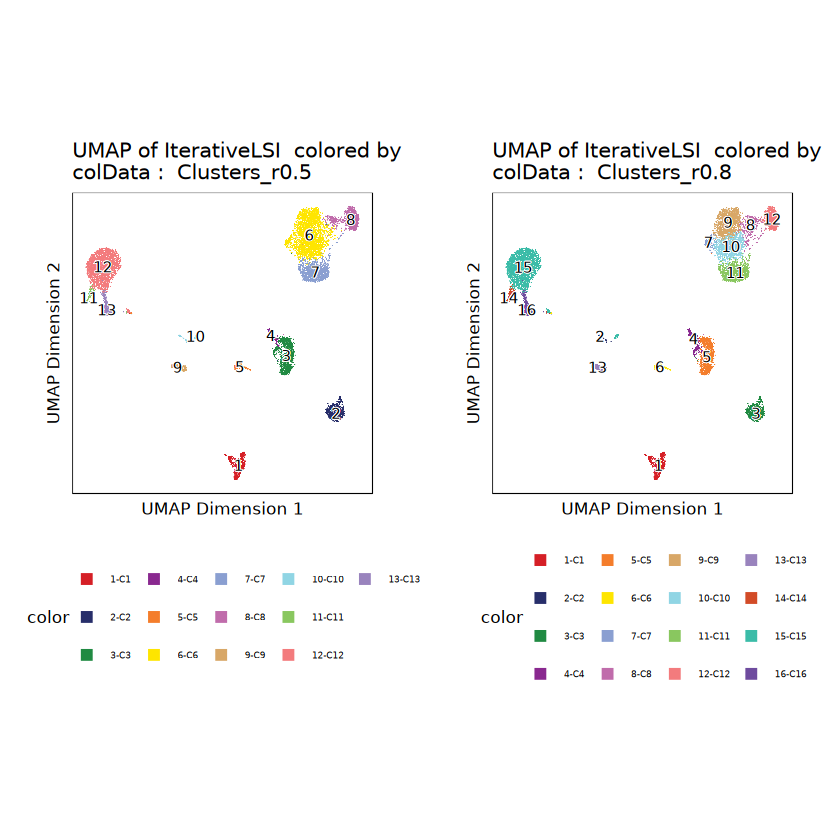

In [13]:
# Plot the embeddings
p1 <- plotEmbedding(ArchRProj = archr_proj, colorBy = "cellColData", name = "Clusters_r0.5", embedding = "UMAP")
p2 <- plotEmbedding(ArchRProj = archr_proj, colorBy = "cellColData", name = "Clusters_r0.8", embedding = "UMAP")
ggAlignPlots(p1, p2, type = "h")

# Step 5
Save the ArchR project

In [14]:
saveArchRProject(archr_proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

class: ArchRProject 
outputDirectory: /nexus/posix0/MPI-psych/g/dept-binder/mpsmgp/ahsant/tutorials/BloodTuotiral 
samples(1): pbmc10k
sampleColData names(1): ArrowFiles
cellColData names(17): Sample TSSEnrichment ... Clusters_r0.8
  Clusters_r0.5
numberOfCells(1): 9252
medianTSS(1): 17.444
medianFrags(1): 19466

In [15]:
sessionInfo()

R version 4.4.3 (2025-02-28)
Platform: x86_64-conda-linux-gnu
Running under: SUSE Linux Enterprise Server 15 SP6

Matrix products: default
BLAS/LAPACK: /nexus/posix0/MPI-psych/g/dept-binder/mpsmgp/ahsant/software/miniforge3/envs/jupyter/lib/libopenblasp-r0.3.28.so;  LAPACK version 3.12.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] nabor_0.5.0                 fut